In [1]:
%cd ..
from src.utils import load_data, PathPlotter, BenchmarkPlotter, DistanceHistoryPlotter
from src.algos import *

NUM_STARTS = 5

/home/rafal/coding/coding/essa-tsp-metaheuristics


In [2]:
df = load_data('data\TSP_29.xlsx')

In [3]:
s = SimulatedAnnealing(temp=100, alpha=.5,reduce_func='reduce', n_iter=1000, verbose=False)
s.solve(df)

best distance: 2650
algorithm: SIMULATED ANNEALING
Neighbourhood type: Swap

n_iter: 1000
reduction function: reduce
alpha: 0.5
start temperatute: 100
solving time: 0.254 s
history: [5830, 5615, 5376, 5280, 5130, 4962, 4926, 4426, 4350, 4163, 4140, 4107, 4025, 4004, 3966, 3954, 3887, 3864, 3683, 3661, 3631, 3598, 3575, 3431, 3414, 3373, 3355, 3355, 3328, 3299, 3220, 3220, 3164, 3120, 3081, 3000, 2980, 2913, 2834, 2795, 2779, 2731, 2660, 2650]

In [4]:
n = NearestNeighbour(verbose=False)
n.solve(df, 14) 

best distance: 2293
algorithm: NEAREST NEIGHBOUR

solving time: 0.019 s

In [5]:
t = TabuSearch(verbose=False, tabu_length=3 , n_iter=30)
t.solve(df)

best distance: 2395
algorithm: TABU SEARCH
Neighbourhood type: Swap

n_iter: 30

solving time: 2.919 s
history: [5956, 4996, 4524, 4242, 3978, 3719, 3448, 3281, 3131, 3052, 2974, 2899, 2825, 2761, 2714, 2690, 2640, 2637, 2620, 2595, 2587, 2565, 2565, 2553, 2521, 2446, 2424, 2395, 2397, 2405, 2426]

In [6]:
h = HillClimber(verbose=False, n_iter=25)
h.solve(df)

best distance: 2889
algorithm: HILL CLIMBER
Neighbourhood type: Swap

n_iter: 25

solving time: 2.584 s
history: [6251, 5442, 5019, 4669, 4371, 4134, 3924, 3713, 3577, 3477, 3364, 3297, 3233, 3173, 3141, 3113, 3087, 3044, 2972, 2946, 2939, 2932, 2919, 2891, 2889]

In [7]:
a = MultistartAlgorithm()(HillClimber, df, n_starts=NUM_STARTS, only_best=True, verbose=False, n_iter=25)
a

best distance: 2324
algorithm: HILL CLIMBER
Neighbourhood type: Swap

n_iter: 25

solving time: 2.295 s
history: [6134, 5079, 4542, 4178, 3865, 3593, 3335, 3144, 2994, 2872, 2776, 2707, 2651, 2604, 2580, 2551, 2531, 2518, 2449, 2415, 2403, 2328, 2326, 2324]

In [8]:
b = MultistartAlgorithm()(SimulatedAnnealing, df, n_starts=NUM_STARTS, only_best=True, temp=1000, alpha=.9, n_iter=100, verbose=False)
b

best distance: 3491
algorithm: SIMULATED ANNEALING
Neighbourhood type: Swap

n_iter: 100
reduction function: reduce
alpha: 0.9
start temperatute: 1000
solving time: 0.027 s
history: [5932, 5771, 5183, 4827, 4647, 4637, 4610, 4506, 4482, 4312, 4312, 4312, 4236, 4160, 4033, 4024, 3978, 3930, 3695, 3563, 3491]

In [9]:
c = MultistartAlgorithm()(TabuSearch, df, n_starts=NUM_STARTS, only_best=True, verbose=False, tabu_length=3 , n_iter=30)
c

best distance: 2275
algorithm: TABU SEARCH
Neighbourhood type: Swap

n_iter: 30

solving time: 2.840 s
history: [6087, 5286, 4674, 4315, 3976, 3805, 3592, 3427, 3267, 3139, 3022, 2915, 2760, 2590, 2498, 2435, 2402, 2378, 2335, 2314, 2293, 2283, 2275, 2275, 2277, 2287, 2295, 2295, 2293, 2283, 2275]

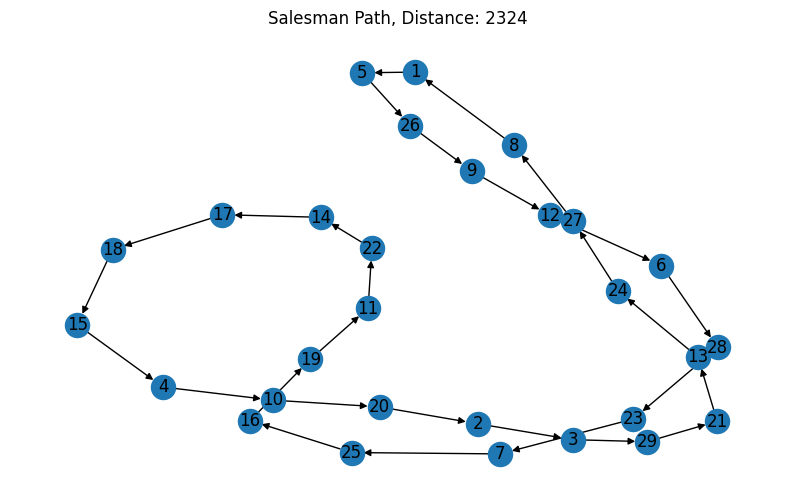

In [10]:
pp = PathPlotter()
pp.plot(a)

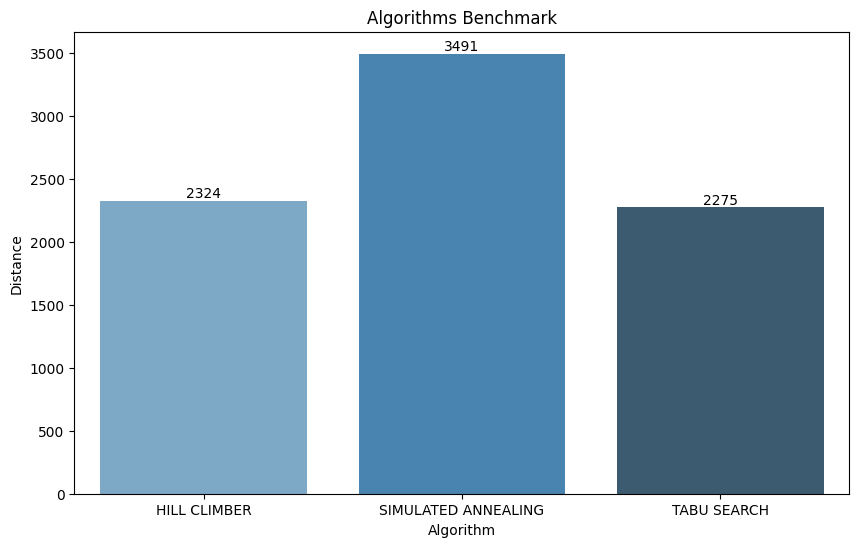

In [11]:
bp = BenchmarkPlotter()
bp.plot([a, b, c])

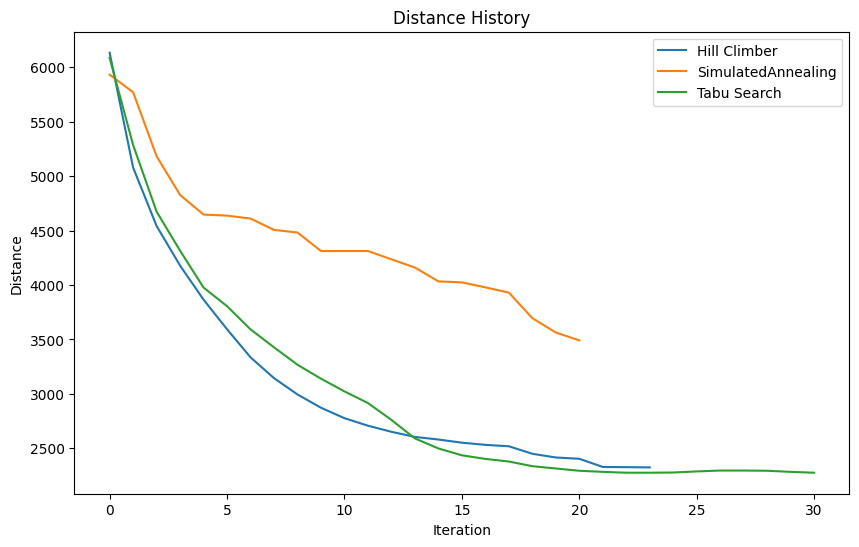

In [12]:
dhp = DistanceHistoryPlotter()
dhp.plot([a, b, c], labels = ["Hill Climber", "SimulatedAnnealing", "Tabu Search"])